In [4]:
import NexusScraper

In [5]:
#get list of target words
targetWords = []
with open('target_words.txt','r') as file:
    for line in file:
        line = line.replace("\n",'')
        targetWords.append(line)

In [6]:
mods = NexusScraper.json_to_modblock('../skyrim_data/skyrim_mods_all.json')

In [7]:
#get all mods whose description contains a word from targetwords
targeted = {mod.get_id(): [[word],mod.udownloads] for mod in mods for word in mod.des.split(' ') if word.lower() in targetWords }

In [ ]:
for key in targeted.keys():
    print(key, end = ' ')
    print(targeted[key][0], end=' ')
    print(targeted[key][1])

In [70]:
#percentage of mods which are targeted here.
print((1-(len(mods)-len(targeted))/len(mods))*100)

0.7411315445683853


In [9]:
#get total popularity of a word across all words in mod descriptions. 
from nltk.tokenize import word_tokenize
import locale

locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

wordCount = {}
tokens = []
    
stopwords = ["'","''",'"','the','and',',','.','to','a','for','of','in','is','you','with','This','!','?','that','A','(',')',
              'from','it','I',"'s",'by','you','your',"you're",':','on','as','The','can','-','this','be','are','or',
              'will','have',"``",'an','my','at','so','not','but','into','some','...','just','It','--','them','also',
              'has',"n't",'which','Which','do','de','only','i','who','what','when','where','why',
              'if','was','&','You',']','[','their','they','http','/','\\',';','@','#','$','%','^','*','~','{','}','|',
              '+','=','<','>','he','she','his','her','hers','to','too','him',"'v","'re","'d"]
for mod in mods:
    if mod.udownloads == '':
        mod.udownloads = mod.downloads
    tokens = set(word_tokenize(mod.des.lower()))

    for token in tokens:
        if token in stopwords:
             continue
        if token in wordCount:
            wordCount[token][0]+=1
            wordCount[token][1]+=locale.atoi(mod.udownloads)
        else:
            wordCount.update({token:[1,locale.atoi(mod.udownloads)]})
                
stuff = list(wordCount.items())
sortedWordCount = sorted(stuff, key=lambda e: e[1][0])
sortedWordCount.reverse()


In [ ]:
for word in sortedWordCount:
    print(word[0])
    print(word[1][1]/word[1][0])

In [10]:
#sort most used words by how popular they are
mostPopularWordsNorm = sorted(sortedWordCount, key = lambda word: word[1][1]/word[1][0])
mostPopularWordsNorm.reverse()

<p>notice how the normalized popular words have almost no relationship to the most used words!</p>
<p>is this an error or is it significant?</p>
<p>might want to make all this csv friendly and run an R script on this to see how they relate exactly</p>

In [ ]:
for word in mostPopularWordsNorm:
    print(word)

In [11]:
import locale

locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

targetWordCounter = {}
for mod in targeted.keys():
    for word in targeted[mod][0]:
        if word.lower() in targetWordCounter:
            targetWordCounter[word.lower()][0]+=1
            targetWordCounter[word.lower()][1]+=locale.atoi(targeted[mod][1])
        else:
            targetWordCounter.update({word.lower():[1,locale.atoi(targeted[mod][1])]})

In [12]:
targetWordCounter

{'cyrodiil': [6, 8187],
 'morrowind': [99, 360092],
 'oblivion': [163, 1079166],
 'reborn': [11, 683550],
 'restored': [6, 5528],
 'returned': [10, 15882]}

In [13]:
#see which group is statistically more popular, targetted words or any random word
targetWordAvg=0;
for word in targetWordCounter.keys():
    targetWordAvg += targetWordCounter[word][1]/targetWordCounter[word][0]

everyWordAvg=0;
for word in mostPopularWordsNorm:
    everyWordAvg += word[1][1]/word[1][0]

targetWordAvg = targetWordAvg/len(targetWordCounter.keys())
everyWordAvg = everyWordAvg/len(mostPopularWordsNorm)

print('all data normalized')
print('targeted average popularity = {0: .4f}'.format(targetWordAvg))
print('total average popularity = {0: .4f}'.format(everyWordAvg))
print('percentage difference targeted/random = {0: 0.4f}%'.format((targetWordAvg/everyWordAvg - 1 )*100))

all data normalized
targeted average popularity =  12712.1476
total average popularity =  11722.8187
percentage difference targeted/random =  8.4393%


<p>targeted words are only slightly more popular on average than a given random word. may be missing something</p>

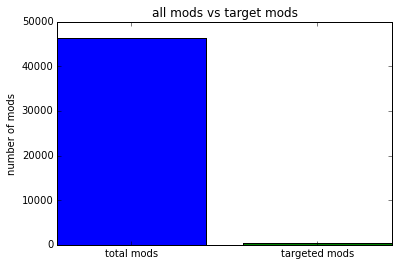

In [74]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

word = [0.4,1.4]
labels = ['total mods', 'targeted mods']

plt.bar(0, len(mostPopularWordsNorm))
plt.bar(1, len(targeted), color='g')

plt.xticks(word, labels)
plt.ylabel('number of mods')

plt.title('all mods vs target mods')

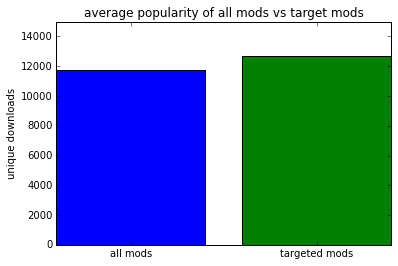

In [72]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

word = [0.4,1.4]
labels = ['all mods', 'targeted mods']

plt.ylim(0,15000)

plt.bar(0, everyWordAvg)
plt.bar(1, targetWordAvg,color='g')

plt.xticks(word, labels)
plt.ylabel('unique downloads')
plt.title('average popularity of all mods vs target mods')